# Take Home Exam - Python for Finance - MaBDA - E.Gallo 

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smf
from scipy.stats import kurtosis, skew

In [107]:
# Importing data
df = pd.read_excel('data_exam_nomacro.xlsx', sheet_name='stocks')

# Problem with dowloading dataset, adding the missing values 
df.loc[5] = ["2017-10-31 00:00:00", 22793.7, 14.84, 16.43, 2.886, 14.04, 49.24]

df.head(10)



,Start Date,2017-10-31 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,End Date,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,FTSEMIB Index,FCA IM Equity,UCG IM Equity,ISP IM Equity,ENI IM Equity,LUX IM Equity
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dates,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
5,2017-10-31 00:00:00,22793.7,14.84,16.43,2.886,14.04,49.24
6,2017-11-01 00:00:00,22992,15.15,16.46,2.878,14.22,48.98
7,2017-11-02 00:00:00,23046,15.29,16.76,2.866,14.3,48.7
8,2017-11-03 00:00:00,23014.1,15.66,16.39,2.85,14.38,48.72
9,2017-11-06 00:00:00,23002.8,15.59,16.3,2.842,14.5,49.13


Let's **clean** the dataframe a little bit

In [108]:
# Changing columns names
df.columns = ["Dates","FTSEMIB Index","FCA IM Equity","UCG IM Equity",
               "ISP IM Equity","ENI IM Equity","LUX IM Equity"]

# Delete initial rows until useful data
df = df[5:]

df.head()

,Dates,FTSEMIB Index,FCA IM Equity,UCG IM Equity,ISP IM Equity,ENI IM Equity,LUX IM Equity
5,2017-10-31 00:00:00,22793.7,14.84,16.43,2.886,14.04,49.24
6,2017-11-01 00:00:00,22992,15.15,16.46,2.878,14.22,48.98
7,2017-11-02 00:00:00,23046,15.29,16.76,2.866,14.3,48.7
8,2017-11-03 00:00:00,23014.1,15.66,16.39,2.85,14.38,48.72
9,2017-11-06 00:00:00,23002.8,15.59,16.3,2.842,14.5,49.13


# 1. Build daily returns for the stock index and for the five stocks

In [4]:
# A look at the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 6 to 527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dates          522 non-null    object
 1   FTSEMIB Index  522 non-null    object
 2   FCA IM Equity  522 non-null    object
 3   UCG IM Equity  522 non-null    object
 4   ISP IM Equity  522 non-null    object
 5   ENI IM Equity  522 non-null    object
 6   LUX IM Equity  522 non-null    object
dtypes: object(7)
memory usage: 28.7+ KB


if we want to obtain the returns:
    $R_{t,t+1} = \frac{P_{t+1}}{P_t}, ~ r_{t,t+1} = log(R_{t,t+1}) = log(P_{t+1}/P_t) = log(P_{t+1}) - log(P_t)$

In [109]:
# I use the pct_change() func to obtain the returns
for i in df.columns[1:]:
    df[i + ' ret'] = df[i].pct_change()

df.head()


,Dates,FTSEMIB Index,FCA IM Equity,UCG IM Equity,ISP IM Equity,ENI IM Equity,LUX IM Equity,FTSEMIB Index ret,FCA IM Equity ret,UCG IM Equity ret,ISP IM Equity ret,ENI IM Equity ret,LUX IM Equity ret
5,2017-10-31 00:00:00,22793.7,14.84,16.43,2.886,14.04,49.24,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-01 00:00:00,22992,15.15,16.46,2.878,14.22,48.98,0.008699,0.020889,0.001826,-0.002772,0.012821,-0.005280
7,2017-11-02 00:00:00,23046,15.29,16.76,2.866,14.3,48.7,0.002351,0.009241,0.018226,-0.004170,0.005626,-0.005717
8,2017-11-03 00:00:00,23014.1,15.66,16.39,2.85,14.38,48.72,-0.001385,0.024199,-0.022076,-0.005583,0.005594,0.000411
9,2017-11-06 00:00:00,23002.8,15.59,16.3,2.842,14.5,49.13,-0.000490,-0.004470,-0.005491,-0.002807,0.008345,0.008415


## 2. Report mean and standard deviation (annualized)

In [110]:
# I want a datetime object to work on that column
df['Dates'] = pd.to_datetime(df['Dates'])

In [111]:
# Divide the dataframe in 3 for each year
df_17 = df[(df['Dates'] >= '2017-11-01') & (df['Dates'] <= '2017-12-31')]
df_18 = df[(df['Dates'] >= '2018-01-01') & (df['Dates'] <= '2018-12-31')]
df_19 = df[(df['Dates'] >= '2019-01-01') & (df['Dates'] <= '2019-12-31')]

df_17.head()

,Dates,FTSEMIB Index,FCA IM Equity,UCG IM Equity,ISP IM Equity,ENI IM Equity,LUX IM Equity,FTSEMIB Index ret,FCA IM Equity ret,UCG IM Equity ret,ISP IM Equity ret,ENI IM Equity ret,LUX IM Equity ret
6,2017-11-01,22992,15.15,16.46,2.878,14.22,48.98,0.008699,0.020889,0.001826,-0.002772,0.012821,-0.005280
7,2017-11-02,23046,15.29,16.76,2.866,14.3,48.7,0.002351,0.009241,0.018226,-0.004170,0.005626,-0.005717
8,2017-11-03,23014.1,15.66,16.39,2.85,14.38,48.72,-0.001385,0.024199,-0.022076,-0.005583,0.005594,0.000411
9,2017-11-06,23002.8,15.59,16.3,2.842,14.5,49.13,-0.000490,-0.004470,-0.005491,-0.002807,0.008345,0.008415
10,2017-11-07,22962.6,15.45,16.23,2.85,14.72,48.58,-0.001750,-0.008980,-0.004294,0.002815,0.015172,-0.011195


In [112]:
# For all the return columns I evaluate the mean and the standard deviation and then I annualized them
for i in df_17.columns[7:]:
    x = np.mean(df_17[i])*252
    y = np.std(df_17[i])*np.sqrt(252)
    print("The annualized MEAN of " + i + " in 2017 " + " is: " + '{:.4f}'.format(x))
    print("The annualized STANDARD DEVIATION of " + i + " in 2017 " + " is: " + '{:.4f}'.format(y) + "\n")



The annualized MEAN of FTSEMIB Index ret in 2017  is: -0.2414
The annualized STANDARD DEVIATION of FTSEMIB Index ret in 2017  is: 0.1041

The annualized MEAN of FCA IM Equity ret in 2017  is: 0.0532
The annualized STANDARD DEVIATION of FCA IM Equity ret in 2017  is: 0.2265

The annualized MEAN of UCG IM Equity ret in 2017  is: -0.2824
The annualized STANDARD DEVIATION of UCG IM Equity ret in 2017  is: 0.2394

The annualized MEAN of ISP IM Equity ret in 2017  is: -0.2284
The annualized STANDARD DEVIATION of ISP IM Equity ret in 2017  is: 0.1547

The annualized MEAN of ENI IM Equity ret in 2017  is: -0.0943
The annualized STANDARD DEVIATION of ENI IM Equity ret in 2017  is: 0.1160

The annualized MEAN of LUX IM Equity ret in 2017  is: 0.2367
The annualized STANDARD DEVIATION of LUX IM Equity ret in 2017  is: 0.1659



In [113]:
for i in df_18.columns[7:]:
    x = np.mean(df_18[i])*252
    y = np.std(df_18[i])*np.sqrt(252)
    print("The annualized MEAN of " + i + " in 2018 " + " is: " + '{:.4f}'.format(x))
    print("The annualized STANDARD DEVIATION of " + i + " in 2018 " + " is: " + '{:.4f}'.format(y) + "\n")

The annualized MEAN of FTSEMIB Index ret in 2018  is: -0.1538
The annualized STANDARD DEVIATION of FTSEMIB Index ret in 2018  is: 0.1798

The annualized MEAN of FCA IM Equity ret in 2018  is: -0.0833
The annualized STANDARD DEVIATION of FCA IM Equity ret in 2018  is: 0.3796

The annualized MEAN of UCG IM Equity ret in 2018  is: -0.3911
The annualized STANDARD DEVIATION of UCG IM Equity ret in 2018  is: 0.3058

The annualized MEAN of ISP IM Equity ret in 2018  is: -0.3004
The annualized STANDARD DEVIATION of ISP IM Equity ret in 2018  is: 0.2935

The annualized MEAN of ENI IM Equity ret in 2018  is: 0.0143
The annualized STANDARD DEVIATION of ENI IM Equity ret in 2018  is: 0.1896

The annualized MEAN of LUX IM Equity ret in 2018  is: 0.0260
The annualized STANDARD DEVIATION of LUX IM Equity ret in 2018  is: 0.1770



In [114]:
for i in df_19.columns[7:]:
    x = np.mean(df_19[i])*252
    y = np.std(df_19[i])*np.sqrt(252)
    print("The annualized MEAN of " + i + " in 2019 " + " is: " + '{:.4f}'.format(x))
    print("The annualized STANDARD DEVIATION of " + i + " in 2019 " + " is: " + '{:.4f}'.format(y) + "\n")

The annualized MEAN of FTSEMIB Index ret in 2019  is: 0.2576
The annualized STANDARD DEVIATION of FTSEMIB Index ret in 2019  is: 0.1498

The annualized MEAN of FCA IM Equity ret in 2019  is: 0.1827
The annualized STANDARD DEVIATION of FCA IM Equity ret in 2019  is: 0.3495

The annualized MEAN of UCG IM Equity ret in 2019  is: 0.2101
The annualized STANDARD DEVIATION of UCG IM Equity ret in 2019  is: 0.3354

The annualized MEAN of ISP IM Equity ret in 2019  is: 0.1909
The annualized STANDARD DEVIATION of ISP IM Equity ret in 2019  is: 0.2333

The annualized MEAN of ENI IM Equity ret in 2019  is: 0.0037
The annualized STANDARD DEVIATION of ENI IM Equity ret in 2019  is: 0.1710

The annualized MEAN of LUX IM Equity ret in 2019  is: -0.0612
The annualized STANDARD DEVIATION of LUX IM Equity ret in 2019  is: 0.0386



# 3. report additional descriptive statistics that you think are useful (i.e., skewness, kurtosis, etc.).


In [115]:
# I evaluate the skewness and the kurtosis to give some insight to the shape of the distributions
kurt = []
ske = []
for i in df.columns[7:]:
    kurt.append(kurtosis(df[i], nan_policy = 'omit'))
    ske.append(skew(df[i], nan_policy = 'omit'))

ske = np.array(ske) #since skew() doesn't return a list

sk = pd.DataFrame(kurt, columns = ['Kurtosis'], index = ['FTSEMIB Index ret', 'FCA IM Equity ret',
                                                         'UCG IM Equity ret','ISP IM Equity ret',
                                                         'ENI IM Equity ret', 'LUX IM Equity ret'] )
sk['Skewness'] = ske

sk
#The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010)


,Kurtosis,Skewness
FTSEMIB Index ret,0.864295,-0.212709
FCA IM Equity ret,7.822372,-0.497436
UCG IM Equity ret,0.537643,0.091192
ISP IM Equity ret,4.071160,-0.414558
ENI IM Equity ret,0.455135,-0.154310
LUX IM Equity ret,6.854225,0.584294


### Kurtosis 
is a measure of whether the data are heavy-tailed (**profusion of outliers**) or light-tailed (**lack of outliers**) relative to a normal distribution(**that has a kurtosis of $3$**).

### Skewness
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
Bulmer(1979) — a classic — suggests this rule of thumb:

- If skewness is less than $−1$ or greater than $+1$, the distribution is **highly skewed**.
- If skewness is between $−1$ and $−1/2$ or between $ 1/2$ and $+1$, the distribution is **moderately skewed**.
- If skewness is between $-1/2$ and $ 1/2$, the distribution is **approximately symmetric**.

In our data we have a polarization for the amount of the outliers $(0.86, 0.53, 0.45)$ and $(4, 6.8, 7.8)$ , while the distributions are **approximately symmetric**, we should expect quasi-normal shape.

Text(0.5, 1.0, 'LUX return')

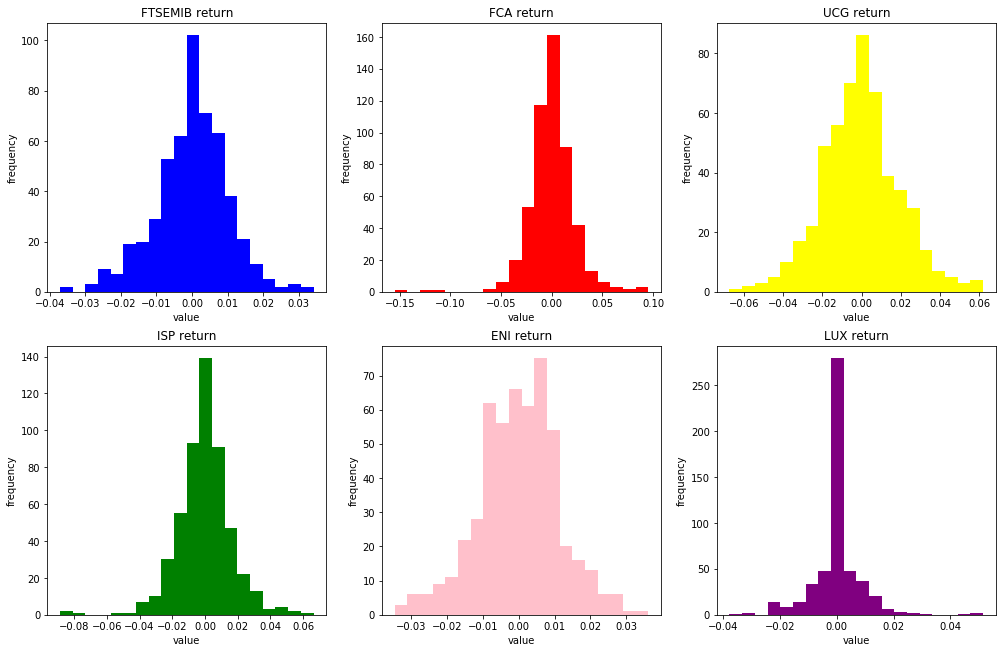

In [55]:
# Start plotting the histogram of the returns 
plt.figure(figsize=(17,7))
plt.subplots_adjust(top = 1.3)# adjust distance between rows
ax = plt.subplot(2,3,1)
ax.hist(df["FTSEMIB Index ret"],bins = 20,color = 'blue')
plt.ylabel('frequency')
plt.xlabel('value')
plt.title('FTSEMIB return')

ax = plt.subplot(2,3,2)
ax.hist(df["FCA IM Equity ret"], bins = 20 ,color = 'red')
plt.ylabel('frequency')
plt.xlabel('value')
plt.title('FCA return')

ax = plt.subplot(2,3,3)
ax.hist(df["UCG IM Equity ret"], bins = 20 ,color = 'yellow')
plt.ylabel('frequency')
plt.xlabel('value')
plt.title('UCG return')

ax = plt.subplot(2,3,4)
ax.hist(df["ISP IM Equity ret"], bins = 20 ,color = 'green')
plt.ylabel('frequency')
plt.xlabel('value')
plt.title('ISP return')

ax = plt.subplot(2,3,5)
ax.hist(df["ENI IM Equity ret"], bins = 20 ,color = 'pink')
plt.ylabel('frequency')
plt.xlabel('value')
plt.title('ENI return')

ax = plt.subplot(2,3,6)
ax.hist(df["LUX IM Equity ret"], bins = 20 ,color = 'purple')
plt.ylabel('frequency')
plt.xlabel('value')
plt.title('LUX return')



Then I evaluate the **correlation matrix** to see how the returns behave in respect to each other

In [116]:
cor_mat = df[['FTSEMIB Index ret', 'FCA IM Equity ret','UCG IM Equity ret',
              'ISP IM Equity ret','ENI IM Equity ret', 'LUX IM Equity ret']].corr()
cor_mat = np.array(cor_mat).round(decimals=2)
cor_mat

array([[1.  , 0.64, 0.76, 0.81, 0.74, 0.33],
       [0.64, 1.  , 0.36, 0.42, 0.43, 0.24],
       [0.76, 0.36, 1.  , 0.79, 0.47, 0.12],
       [0.81, 0.42, 0.79, 1.  , 0.54, 0.15],
       [0.74, 0.43, 0.47, 0.54, 1.  , 0.24],
       [0.33, 0.24, 0.12, 0.15, 0.24, 1.  ]])

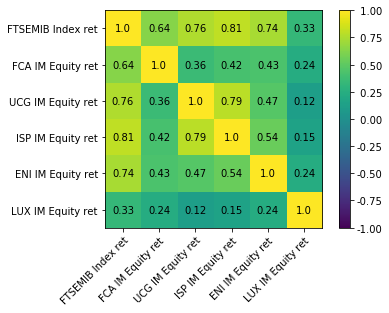

In [118]:
# Plotting the correlation-matrix
retur = ['FTSEMIB Index ret', 'FCA IM Equity ret','UCG IM Equity ret','ISP IM Equity ret','ENI IM Equity ret', 'LUX IM Equity ret']

fig, ax = plt.subplots()
im = ax.imshow(cor_mat)
im.set_clim(-1, 1)
ax.grid(False)
ax.set_xticks(np.arange(len(retur)))
ax.set_yticks(np.arange(len(retur)))
ax.set_xticklabels(retur)
ax.set_yticklabels(retur)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for i in range(6):
    for j in range(6):
        ax.text(j, i, cor_mat[i, j], ha='center', va='center',
                color='black')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

- From the correlation matrix we can see that almost every index return has a tight relationship with the **FTSEMIB index** (but luxottica)
- Only **UCG** and **ISP** seem to be correlated probably because they are from the banking sector

# 4. Plot the mean and standard deviation of returns computed over a rolling window of 60 days.

In [119]:
df_r = df.iloc[:,7:]# select only return columns
df_re = df_r.drop(5)# dropping the 5th row full of NaN values
df_re.head()

,FTSEMIB Index ret,FCA IM Equity ret,UCG IM Equity ret,ISP IM Equity ret,ENI IM Equity ret,LUX IM Equity ret
6,0.008699,0.020889,0.001826,-0.002772,0.012821,-0.005280
7,0.002351,0.009241,0.018226,-0.004170,0.005626,-0.005717
8,-0.001385,0.024199,-0.022076,-0.005583,0.005594,0.000411
9,-0.000490,-0.004470,-0.005491,-0.002807,0.008345,0.008415
10,-0.001750,-0.008980,-0.004294,0.002815,0.015172,-0.011195


In [120]:
# Evaluate the mean and the standard deviation with a rolling window of 60 days and add them to the return dataframe
for i in df_re.columns:
    df_re[i + ' 60d'] = df_re[i].rolling(window=60,center=False).mean()#
    
for i in df_re.columns[:6]:    
    df_re[i + ' vol'] = df_re[i].rolling(window=60,center=False).std()#


In [122]:
# Add the 'Dates' columns
df_re['Dates'] = df['Dates']
df_re.tail()

,FTSEMIB Index ret,FCA IM Equity ret,UCG IM Equity ret,ISP IM Equity ret,ENI IM Equity ret,LUX IM Equity ret,FTSEMIB Index ret 60d,FCA IM Equity ret 60d,UCG IM Equity ret 60d,ISP IM Equity ret 60d,ENI IM Equity ret 60d,LUX IM Equity ret 60d,FTSEMIB Index ret vol,FCA IM Equity ret vol,UCG IM Equity ret vol,ISP IM Equity ret vol,ENI IM Equity ret vol,LUX IM Equity ret vol,Dates
523,0.003621,-0.000843,-0.006204,0.000661,-0.006932,0.0,0.001251,0.000295,0.001966,0.002624,0.000499,0.0,0.010744,0.014265,0.021879,0.013671,0.011590,2.293517e-10,2019-10-25
524,0.003833,0.005233,0.004162,0.002640,-0.007265,0.0,0.001531,0.000437,0.002090,0.002538,0.000622,0.0,0.010584,0.014271,0.021870,0.013654,0.011465,2.293517e-10,2019-10-28
525,-0.000657,-0.013434,0.010534,-0.002853,-0.007892,0.0,0.001634,0.000081,0.002407,0.002687,0.000609,0.0,0.010531,0.014348,0.021852,0.013543,0.011475,2.293517e-10,2019-10-29
526,-0.001528,0.095319,-0.018797,-0.010343,-0.009401,0.0,0.001684,0.001761,0.002917,0.002811,0.000689,0.0,0.010509,0.018873,0.020959,0.013386,0.011386,2.293517e-10,2019-10-30
527,0.001216,0.094328,-0.015674,-0.006226,-0.005840,0.0,0.001459,0.003119,0.002417,0.002399,0.000288,0.0,0.010369,0.022304,0.021040,0.013274,0.011181,2.293517e-10,2019-10-31


Text(0.5, 1.0, 'ISP/ENI/LUX rolling mean 60d')

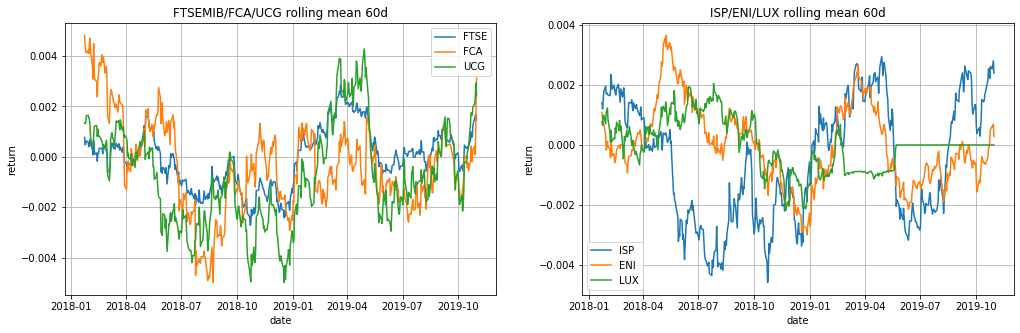

In [123]:
# Plotting the mean 
plt.figure(figsize=(17,5))
ax = plt.subplot(1,2,1)
ax.plot(df_re[["Dates"]],df_re[["FTSEMIB Index ret 60d"]],lw=1.5,label='FTSE')
ax.plot(df_re[["Dates"]],df_re[["FCA IM Equity ret 60d"]],lw=1.5,label='FCA')
ax.plot(df_re[["Dates"]],df_re[["UCG IM Equity ret 60d"]],lw=1.5,label='UCG')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('return')
plt.xlabel('date')
plt.title('FTSEMIB/FCA/UCG rolling mean 60d')

ax = plt.subplot(1,2,2)
ax.plot(df_re[["Dates"]],df_re[["ISP IM Equity ret 60d"]],lw=1.5,label='ISP')
ax.plot(df_re[["Dates"]],df_re[["ENI IM Equity ret 60d"]],lw=1.5,label='ENI')
ax.plot(df_re[["Dates"]],df_re[["LUX IM Equity ret 60d"]],lw=1.5,label='LUX')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('return')
plt.xlabel('date')
plt.title('ISP/ENI/LUX rolling mean 60d')

Text(0.5, 1.0, 'ISP/ENI/LUX rolling std 60d')

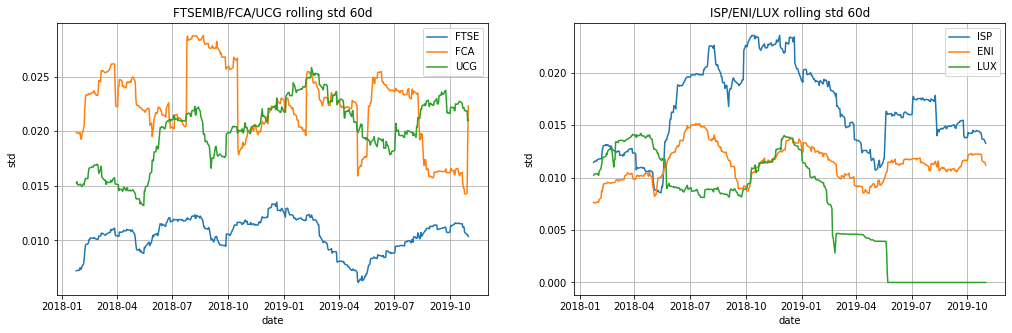

In [28]:
# Plotting standard deviation
plt.figure(figsize=(17,5))
ax = plt.subplot(1,2,1)
ax.plot(df_re[["Dates"]],df_re[["FTSEMIB Index ret vol"]],lw=1.5,label='FTSE')
ax.plot(df_re[["Dates"]],df_re[["FCA IM Equity ret vol"]],lw=1.5,label='FCA')
ax.plot(df_re[["Dates"]],df_re[["UCG IM Equity ret vol"]],lw=1.5,label='UCG')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('std')
plt.xlabel('date')
plt.title('FTSEMIB/FCA/UCG rolling std 60d')

ax = plt.subplot(1,2,2)
ax.plot(df_re[["Dates"]],df_re[["ISP IM Equity ret vol"]],lw=1.5,label='ISP')
ax.plot(df_re[["Dates"]],df_re[["ENI IM Equity ret vol"]],lw=1.5,label='ENI')
ax.plot(df_re[["Dates"]],df_re[["LUX IM Equity ret vol"]],lw=1.5,label='LUX')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('std')
plt.xlabel('date')
plt.title('ISP/ENI/LUX rolling std 60d')

# 5. for each of the five stock, estimate a OLS regression where the dependent variable are the daily stock returns and the independent variables are the daily returns on the stock index (and a constant). Call the OLS coefficient on the stock index β . Report the β , and the associated p-values at 5% significance level.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 5 to 527
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Dates              523 non-null    datetime64[ns]
 1   FTSEMIB Index      523 non-null    object        
 2   FCA IM Equity      523 non-null    object        
 3   UCG IM Equity      523 non-null    object        
 4   ISP IM Equity      523 non-null    object        
 5   ENI IM Equity      523 non-null    object        
 6   LUX IM Equity      523 non-null    object        
 7   FTSEMIB Index ret  522 non-null    float64       
 8   FCA IM Equity ret  522 non-null    float64       
 9   UCG IM Equity ret  522 non-null    float64       
 10  ISP IM Equity ret  522 non-null    float64       
 11  ENI IM Equity ret  522 non-null    float64       
 12  LUX IM Equity ret  522 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 53.2+ K

In [125]:
# since I found problem estimating the OLS regression due to the NaN values, I look for solving the problem
df.isna().sum()


Dates                0
FTSEMIB Index        0
FCA IM Equity        0
UCG IM Equity        0
ISP IM Equity        0
ENI IM Equity        0
LUX IM Equity        0
FTSEMIB Index ret    1
FCA IM Equity ret    1
UCG IM Equity ret    1
ISP IM Equity ret    1
ENI IM Equity ret    1
LUX IM Equity ret    1
dtype: int64

In [126]:
# Since NaN values are only in daily returns columns we substitute them with the mean values
df = df.fillna(df.mean())

In [127]:
# Estimate a OLS regression with FCA to see the output of the OLS
mod = smf.OLS(df[["FCA IM Equity ret"]],df[["FTSEMIB Index ret"]]).fit()
print(mod.summary())
print("\n" + "the slopeness β of the regression line is:")
print(mod.params)
print("\n" + "the p-value at 5% significant level is:")
print(mod.pvalues)

                                 OLS Regression Results                                
Dep. Variable:      FCA IM Equity ret   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                              352.8
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    1.65e-60
Time:                        20:45:30   Log-Likelihood:                          1378.3
No. Observations:                 523   AIC:                                     -2755.
Df Residuals:                     522   BIC:                                     -2750.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [128]:
# ..then estimate the regression for the other 4 stocks
for i in df.columns[9:13]:
    mod = smf.OLS(df[[i]],df[["FTSEMIB Index ret"]]).fit()#FTSEMIB Index ret INCREASE BY 1 THEN FCA INCREASES OF 1.3880
    print("\n" + "For " + i + " stock")
    print("\n" + "the slopeness β of the regression line is:") #BETA = COV(X,Y)/VAR(X)
    print(mod.params)
    print("\n" + "the p-value at 5% significant level is:")
    print(mod.pvalues)


For UCG IM Equity ret stock

the slopeness β of the regression line is:
FTSEMIB Index ret    1.469239
dtype: float64

the p-value at 5% significant level is:
FTSEMIB Index ret    1.281190e-100
dtype: float64

For ISP IM Equity ret stock

the slopeness β of the regression line is:
FTSEMIB Index ret    1.29487
dtype: float64

the p-value at 5% significant level is:
FTSEMIB Index ret    6.097470e-123
dtype: float64

For ENI IM Equity ret stock

the slopeness β of the regression line is:
FTSEMIB Index ret    0.798217
dtype: float64

the p-value at 5% significant level is:
FTSEMIB Index ret    1.899560e-90
dtype: float64

For LUX IM Equity ret stock

the slopeness β of the regression line is:
FTSEMIB Index ret    0.276711
dtype: float64

the p-value at 5% significant level is:
FTSEMIB Index ret    7.243908e-15
dtype: float64


# 6. Plot the β  of each stock (x-axis) against the average daily stock returns (y-axis).

In [130]:
# Estimate the average daily returns 
df_mean = []
for i in df.columns[8:]:
    x = np.mean(df[i])
    df_mean.append(float("{:.5f}".format(x)))
print(df_mean)

# beta values from previous results
beta = [1.3880,  1.4709, 1.2970, 0.7972 , 0.2779]

[0.00016, -0.00052, -0.00035, 0.0, 3e-05]


Text(0.5, 1.0, 'β against avg daily returns')

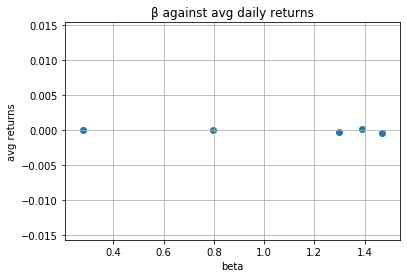

In [134]:
plt.scatter(beta, df_mean)
plt.grid(True)
plt.ylabel('avg returns')
plt.xlabel('beta')
plt.title('β against avg daily returns')

# Problem 2

## 1. plot the yield curve for the first and last available dates, along the average yield curve (recall: the yield curve is a plot of the yield to maturities as function of the zero-coupon bond maturities).

In [135]:
# Import data
fd = pd.read_excel('data_exam_nomacro.xlsx', sheet_name='bonds')

# Problems with downloading dataset
fd.loc[5] = ["2015-10-30 00:00:00", -0.0958, -0.0237, 0.0739, 0.6584, 1.6382]

fd.head(10)

,Start Date,2015-10-30 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,End Date,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,C9053M Index,C9051Y Index,C9052Y Index,C9055Y Index,C90510Y Index
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Dates,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
5,2015-10-30 00:00:00,-0.0958,-0.0237,0.0739,0.6584,1.6382
6,2015-11-30 00:00:00,-0.1237,-0.0663,0.0006,0.5409,1.4942
7,2015-12-31 00:00:00,-0.1985,-0.0751,0.0266,0.6693,1.651
8,2016-01-29 00:00:00,-0.1311,-0.0809,-0.0194,0.5139,1.5008
9,2016-02-29 00:00:00,-0.1304,-0.0805,-0.0133,0.4995,1.4785


In [136]:
# Cleaning
fd.columns = ["Dates","C9053M Index", "C9051Y Index","C9052Y Index", "C9055Y Index","C90510Y Index" ]
fd = fd[5:]
fd.head()

,Dates,C9053M Index,C9051Y Index,C9052Y Index,C9055Y Index,C90510Y Index
5,2015-10-30 00:00:00,-0.0958,-0.0237,0.0739,0.6584,1.6382
6,2015-11-30 00:00:00,-0.1237,-0.0663,0.0006,0.5409,1.4942
7,2015-12-31 00:00:00,-0.1985,-0.0751,0.0266,0.6693,1.651
8,2016-01-29 00:00:00,-0.1311,-0.0809,-0.0194,0.5139,1.5008
9,2016-02-29 00:00:00,-0.1304,-0.0805,-0.0133,0.4995,1.4785


In [137]:
# Get values for the first and last date available, and then get the average values
first_date = fd.iloc[5, 1:]
last_date = fd.iloc[-1, 1:]

avg = []
for i in fd.columns[1:]:
    avg.append(np.mean(fd[i]))
avg = np.round(avg, 5)   

bonds = ["3months","1year", "2year", "5year", "10year"]
first_date = pd.Series(first_date).values
last_date = pd.Series(last_date).values
print(first_date)
print(last_date)
print(avg)
print(bonds)



[-0.1848 -0.0707 -0.0161 0.3948 1.3056]
[-0.2925 -0.1924 -0.0529 0.4053 1.0733]
[-0.22725 -0.02456  0.23403  1.04088  2.03173]
['3months', '1year', '2year', '5year', '10year']


In [138]:
# Create 'bond' dataframe to plot 
bond = pd.DataFrame(first_date,columns = ["first_date"] )
bond['last_date'] = last_date
bond['avg'] = avg
bond['maturities'] = bonds
bond

,first_date,last_date,avg,maturities
0,-0.1848,-0.2925,-0.22725,3months
1,-0.0707,-0.1924,-0.02456,1year
2,-0.0161,-0.0529,0.23403,2year
3,0.3948,0.4053,1.04088,5year
4,1.3056,1.0733,2.03173,10year


Text(0.5, 1.0, 'Yield Curves')

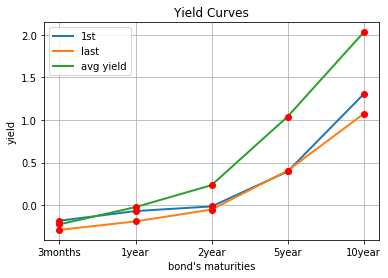

In [139]:
# Plotting the dataframe
plt.plot(bond['maturities'], bond['first_date'], label = '1st', lw = 2)
plt.plot(bond['maturities'], bond['last_date'], label = 'last', lw = 2)
plt.plot(bond['maturities'], bond['avg'], label = 'avg yield', lw = 2)
plt.plot(bond['maturities'], bond[['first_date', 'last_date', 'avg']], 'ro')
plt.grid(True)
plt.legend(loc = 0)
plt.xlabel("bond's maturities")
plt.ylabel("yield")
plt.title("Yield Curves")

The average yield curve is definitely sloped **positively**